In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
from pprint import pprint
import datetime
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read NY houses from the file.
#### Replace null values for the bed, bath, acre_lot, and house_size features with the mode value.
#### Drop all other rows with null values.

In [2]:
ny_realtor_data_df = pd.read_csv('NewYork-realtor-data.csv')
ny_realtor_data_df.drop(columns=["Unnamed: 0"],inplace=True)


ny_realtor_data_df['bed'].fillna(ny_realtor_data_df['bed'].mode()[0], inplace=True)
ny_realtor_data_df['bath'].fillna(ny_realtor_data_df['bath'].mode()[0], inplace=True)
ny_realtor_data_df['acre_lot'].fillna(ny_realtor_data_df['acre_lot'].mode()[0], inplace=True)
ny_realtor_data_df['house_size'].fillna(ny_realtor_data_df['house_size'].mode()[0], inplace=True)

#ny_realtor_data_df["acre_lot"] = ny_realtor_data_df["acre_lot"].fillna(0)
#ny_realtor_data_df["bed"] = ny_realtor_data_df["bed"].fillna(0)
#ny_realtor_data_df["bath"] = ny_realtor_data_df["bath"].fillna(0)
#ny_realtor_data_df["house_size"] = ny_realtor_data_df["house_size"].fillna(0)

ny_realtor_data_df.dropna(inplace=True)
ny_realtor_data_df.head()

status  bed  bath  acre_lot       city     state  zip_code  house_size  \
1  for_sale  3.0   2.0      2.02  Claverack  New York   12521.0      1600.0   
2  for_sale  4.0   2.0      0.24     Copake  New York   12521.0      1239.0   
5  for_sale  4.0   1.0      4.20     Copake  New York   12516.0      1500.0   
6  for_sale  3.0   2.0      2.90  Hillsdale  New York   12529.0      1404.0   
7  for_sale  3.0   2.0      1.20  Millerton  New York   12546.0      1350.0   

  prev_sold_date     price  prev_sold_year  
1     2021-11-24  425000.0          2021.0  
2     2018-02-01  225000.0          2018.0  
5     2006-05-08  299999.0          2006.0  
6     2005-12-22  374900.0          2005.0  
7     2018-08-31  375000.0          2018.0

#### Group and count the zip_code feature

In [3]:
ny_realtor_data_df.groupby(["zip_code"])["zip_code"].count().sort_values(ascending=False).head()

zip_code
10023.0    373
10011.0    370
10022.0    360
10016.0    333
11201.0    311
Name: zip_code, dtype: int64

#### Create new feature prev_sold_year from prev_sold_date

In [4]:
ny_realtor_data_df["prev_sold_year"] = pd.to_datetime(ny_realtor_data_df["prev_sold_date"], format='%Y-%m-%d').dt.year
ny_realtor_data_df["prev_sold_year"].value_counts().head()

2021    2514
2017    2195
2018    1944
2016    1926
2019    1840
Name: prev_sold_year, dtype: int64

### Select the rows where the year is after 2015, the state is NY, the status is for sale, and the zip code is in NY

In [5]:
realtor_data_df = ny_realtor_data_df[(ny_realtor_data_df["prev_sold_year"] > 2015.0) &
                                     (ny_realtor_data_df["state"].isin(["New York"])) &
                                     (ny_realtor_data_df["status"] == "for_sale") 
                                    ]
realtor_data_df.drop(columns=["prev_sold_year"],inplace=True)
realtor_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12913 entries, 1 to 67140
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          12913 non-null  object 
 1   bed             12913 non-null  float64
 2   bath            12913 non-null  float64
 3   acre_lot        12913 non-null  float64
 4   city            12913 non-null  object 
 5   state           12913 non-null  object 
 6   zip_code        12913 non-null  float64
 7   house_size      12913 non-null  float64
 8   prev_sold_date  12913 non-null  object 
 9   price           12913 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.1+ MB


#### Draw some graphs the price feature so we can start to look for outliers.

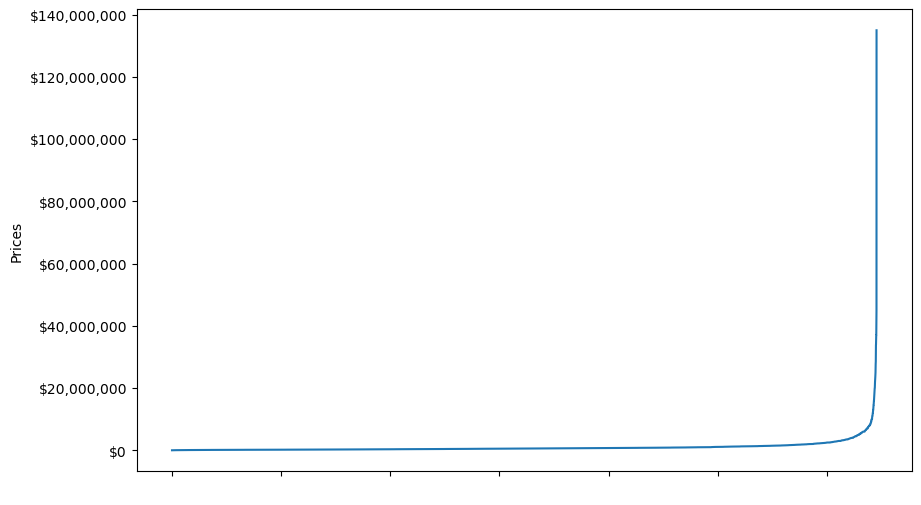

In [6]:
graph_df = realtor_data_df.sort_values(by="price")
graph_df.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

plt.plot(graph_df.index,graph_df["price"])
plt.xlabel("")
plt.ylabel("Prices")
#plt.legend(loc="best")
plt.show()

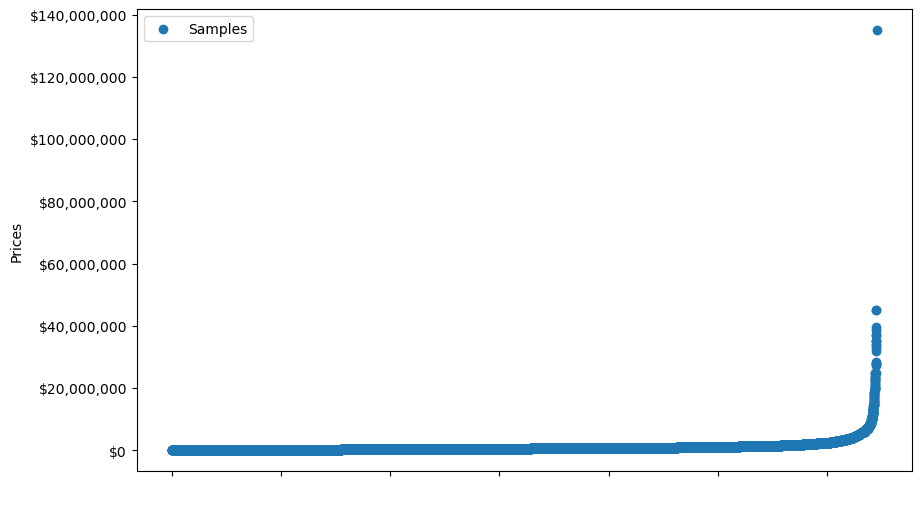

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

ax.scatter(x=graph_df.index, y=graph_df["price"], label="Samples")
plt.xlabel("")
plt.ylabel("Prices")
plt.legend(loc="best")
plt.show()

(array([1.2124e+04, 4.9300e+02, 1.7500e+02, 4.0000e+01, 2.1000e+01,
        1.3000e+01, 9.0000e+00, 9.0000e+00, 7.0000e+00, 3.0000e+00,
        5.0000e+00, 1.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.000e+00, 2.700e+06, 5.400e+06, 8.100e+06, 1.080e+07, 1.350e+07,
        1.620e+07, 1.890e+07, 2.160e+07, 2.430e+07, 2.700e+07, 2.970e+07,
        3.240e+07, 3.510e+07, 3.780e+07, 4.050e+07, 4.320e+07, 4.590e+07,
        4.860e+07, 5.130e+07, 5.400e+07, 5.670e+07, 5.940e+07, 6.210e+07,
        6.480e+07, 6.7

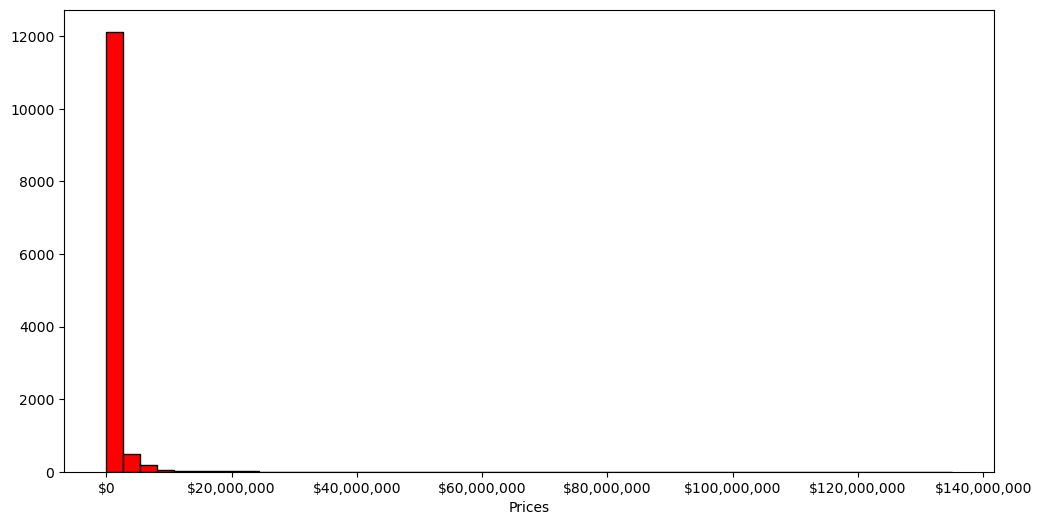

In [8]:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.ticklabel_format(style='plain')

ax.xaxis.set_major_formatter('${x:1,.0f}')

ax.set_xlabel('Prices')

plt.hist(graph_df["price"], bins=50, color='red', edgecolor='black')

### Try a few different techniques to find the price outliers.

#### First we can try calculating whiskers.

In [9]:
Q1 = realtor_data_df["price"].quantile(0.25)
print("Q1 = ${:,.0f}".format(Q1))

Q1 = $265,000


In [10]:
Q3 = realtor_data_df["price"].quantile(0.75)
print("Q3 = ${:,.0f}".format(Q3))

Q3 = $985,000


In [11]:
IQR = Q3 - Q1
print("IQR = ${:,.0f}".format(IQR))

IQR = $720,000


In [12]:
upper_whisker = Q3 + (1.5 * IQR)
print("Upper Whisker = ${:,.0f}".format(upper_whisker))

Upper Whisker = $2,065,000


In [13]:
lower_whisker = Q1 - (1.5 * IQR)
print("Lower Whisker = ${:,.0f}".format(lower_whisker))

Lower Whisker = $-815,000


#### Draw a boxplot with the values and use the whiskers as tick marks.

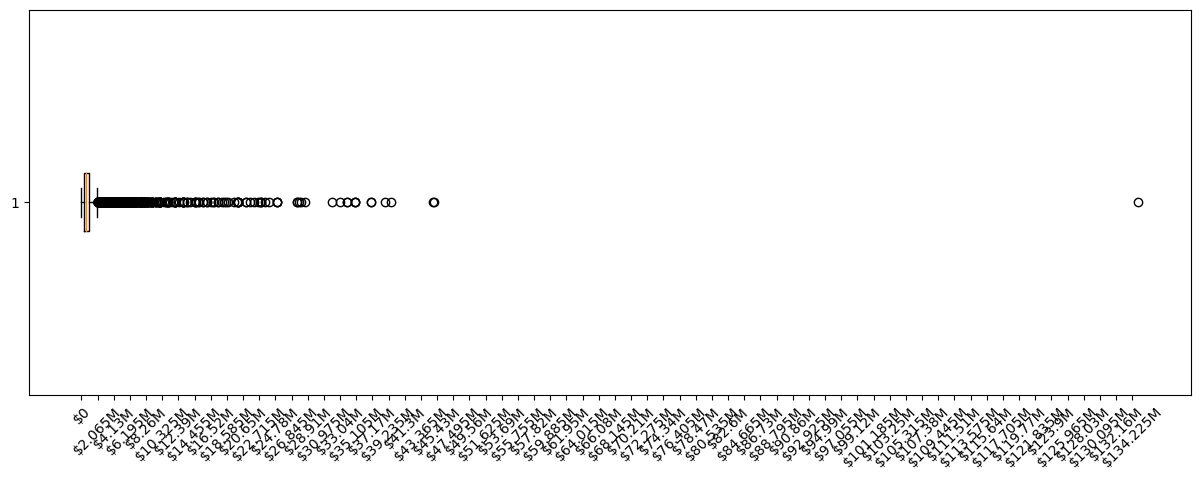

In [14]:
def format_fn(tick_val, tick_pos):
    what = tick_val/1000000
    rtnval = "$" + str(what) + "M"
    if (what==0):
        rtnval = "$0"
    return rtnval

start = min(realtor_data_df.price)
end =  max(realtor_data_df.price)

tick_step = upper_whisker - start

fig, ax = plt.subplots(figsize=(15, 5))

ax.ticklabel_format(style='plain')
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_ticks(np.arange(start, end, tick_step))
ax.yaxis.set_major_formatter(' ')

bp = plt.boxplot(realtor_data_df.price, vert=False)
plt.xticks(rotation=45)
plt.show()

In [15]:
box_plot_dict = {}
box_plot_dict['lower_whisker'] = bp['whiskers'][0].get_xdata()[1]
box_plot_dict['lower_quartile'] = bp['boxes'][0].get_xdata()[1]
box_plot_dict['median'] = bp['medians'][0].get_xdata()[1]
box_plot_dict['upper_quartile'] = bp['boxes'][0].get_xdata()[2]
box_plot_dict['upper_whisker'] = bp['whiskers'][(0)+1].get_xdata()[1]


print("${:,.0f}".format(box_plot_dict['lower_whisker']))
print("${:,.0f}".format(box_plot_dict['upper_whisker']))

$0
$2,050,000


##### Count the number of outliers found.

In [16]:
realtor_data_df[realtor_data_df["price"] > box_plot_dict['upper_whisker']]["price"].count()

1155

#### Draw a Seaborn Box Plot with the data to see what it says are the whiskers and outliers.

In [17]:
df = px.data.tips()
fig = px.box(realtor_data_df, x="price", points="all")
fig.show()

#### Next lets use Z Score to find outlier in the price feature

In [18]:
realtor_data_df['z_price'] = stats.zscore(realtor_data_df['price'])

In [19]:
realtor_data_df.head()

status  bed  bath  acre_lot          city     state  zip_code  \
1   for_sale  3.0   2.0      2.02     Claverack  New York   12521.0   
2   for_sale  4.0   2.0      0.24        Copake  New York   12521.0   
7   for_sale  3.0   2.0      1.20     Millerton  New York   12546.0   
16  for_sale  3.0   2.0      5.01  East Chatham  New York   12060.0   
27  for_sale  3.0   2.0     19.70     Hillsdale  New York   12529.0   

    house_size prev_sold_date     price   z_price  
1       1600.0     2021-11-24  425000.0 -0.249253  
2       1239.0     2018-02-01  225000.0 -0.334305  
7       1350.0     2018-08-31  375000.0 -0.270516  
16      2504.0     2020-11-09  435000.0 -0.245001  
27      1200.0     2021-01-20  625000.0 -0.164202

##### Z Score > 3 is standard for excluding rows

In [20]:
price_outliers_list = list(np.where(np.abs(realtor_data_df['z_price']) > 3)[0])

##### List the indexes of the outliers found by Z Score

In [21]:
print("Price Outliers: ", price_outliers_list)
print("Total Outlier Price: ", len(price_outliers_list), "\n")
price_outliers_list_set = list(set(price_outliers_list))

Price Outliers:  [89, 356, 520, 549, 597, 684, 731, 787, 928, 944, 991, 1068, 1159, 1177, 1182, 1208, 1209, 1224, 1271, 1273, 1290, 1292, 1320, 1324, 1412, 1422, 1440, 1446, 1466, 1535, 1615, 1619, 1809, 1877, 2024, 2037, 2329, 2412, 2455, 2526, 2592, 2678, 2704, 2814, 3108, 3159, 3351, 3710, 3735, 3791, 3811, 3886, 3887, 3889, 3905, 3908, 3909, 3914, 4028, 4032, 4040, 4044, 4051, 4066, 4140, 4375, 4432, 4540, 4578, 4591, 4858, 5016, 5405, 5983, 6054, 6111, 6401, 7443, 7639, 7640, 8351, 8384, 8482, 8483, 8484, 8486, 8507, 8533, 8603, 8605, 8607, 8625, 8626, 8636, 8640, 8655, 8662, 8664, 8665, 8672, 8676, 8680, 8688, 8704, 8719, 8723, 8746, 8747, 8748, 8749, 8750, 8752, 8753, 8754, 8755, 8756, 8758, 8759, 8762, 8763, 8764]
Total Outlier Price:  121 



In [22]:
realtor_data_df.iloc[price_outliers_list_set, :].sort_values("price",ascending=False)

status   bed  bath  acre_lot              city     state  zip_code  \
20540  for_sale   5.0   6.0      0.05          New York  New York   10022.0   
8238   for_sale   4.0   5.0      0.05         Manhattan  New York   10007.0   
44647  for_sale  11.0  13.0      5.18       Southampton  New York   11968.0   
44642  for_sale   5.0  12.0      3.00       Southampton  New York   11968.0   
31877  for_sale  13.0  17.0     27.47  Upper Brookville  New York   11545.0   
45059  for_sale   8.0  11.0      4.20        Water Mill  New York   11976.0   
44719  for_sale  11.0  13.0      3.00       Southampton  New York   11968.0   
15621  for_sale   3.0   5.0      0.05          New York  New York   10022.0   
5324   for_sale   4.0   5.0      0.05          New York  New York   10013.0   
21675  for_sale   4.0   6.0      0.05         Manhattan  New York   10028.0   
45052  for_sale   9.0  11.0      0.05         Watermill  New York   11976.0   
45067  for_sale  12.0   9.0      2.01       Southampton  New York   11968.0   
10054  for_sale   5.0   6.0      0.05          New York  New York   10128.0   
23303  for_sale   4.0   5.0      0.05          New York  New York   10002.0   
7104   for_sale   5.0   7.0      0.05          New York  New York   10013.0   
9086   for_sale   3.0   5.0      0.05          New York  New York   10022.0   
20555  for_sale   3.0   4.0      0.05          New York  New York   10022.0   
45058  for_sale   9.0  12.0      1.00        Water Mill  New York   11976.0   
20139  for_sale   3.0   4.0      0.52     New York City  New York   10021.0   
20657  for_sale   3.0   5.0      0.05          New York  New York   10022.0   
19696  for_sale   5.0   7.0      0.05          New York  New York   10007.0   
28468  for_sale  10.0  11.0      7.11        Great Neck  New York   11024.0   
6939   for_sale   5.0   6.0      0.05          New York  New York   10013.0   
6614   for_sale   4.0   7.0      0.05     New York City  New York   10012.0   
5720   for_sale   3.0   3.0      0.05     New York City  New York   10019.0   
45041  for_sale   8.0  11.0      1.94       Southampton  New York   11968.0   
17833  for_sale   5.0   6.0      0.05     New York City  New York   10075.0   
21276  for_sale   5.0   6.0      0.05          New York  New York   10019.0   
7877   for_sale   4.0   4.0      0.05     New York City  New York   10011.0   
7321   for_sale   3.0   4.0      0.05     New York City  New York   10011.0   
45069  for_sale  10.0  11.0      2.31        Water Mill  New York   11976.0   
45042  for_sale  10.0  15.0      1.50     Bridgehampton  New York   11976.0   
20552  for_sale   3.0   4.0      0.05          New York  New York   10022.0   
45053  for_sale   7.0  10.0      1.00       Southampton  New York   11968.0   
44683  for_sale   7.0   9.0      0.99       Southampton  New York   11968.0   
45046  for_sale  12.0  12.0      2.75        Water Mill  New York   11976.0   
21330  for_sale   4.0   5.0      0.05     New York City  New York   10019.0   
44784  for_sale   6.0   8.0      2.00      East Hampton  New York   11937.0   
3279   for_sale   5.0   7.0      0.05     New York City  New York   10069.0   
21344  for_sale   3.0   4.0      0.05     New York City  New York   10019.0   
23923  for_sale   5.0   6.0      0.05     New York City  New York   10065.0   
3072   for_sale   4.0   5.0      0.46     New York City  New York   10021.0   
44840  for_sale   9.0  10.0      4.19        Remsenburg  New York   11960.0   
45055  for_sale   9.0  11.0      0.05        Water Mill  New York   11976.0   
44537  for_sale   3.0   2.0      0.85        Sag Harbor  New York   11963.0   
45085  for_sale   3.0   2.0      1.85       Southampton  New York   11968.0   
44397  for_sale   4.0   5.0      0.05       Southampton  New York   11968.0   
7296   for_sale   7.0  12.0      0.05     New York City  New York   10011.0   
6522   for_sale   4.0   6.0      0.05     New York City  New York   10014.0   
2204   for_sale  12.0  18.0      0.05       Belle Terre  Ne

#### Draw a line graph with the data excluding outliers indentified by the whiskers.

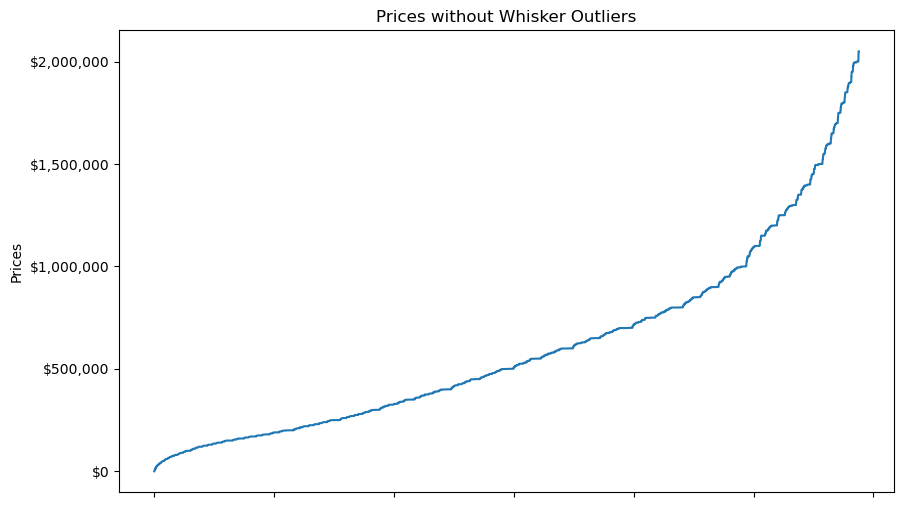

In [23]:
graph_df = realtor_data_df[realtor_data_df["price"] <= upper_whisker].sort_values(by="price")
graph_df.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

plt.plot(graph_df.index,graph_df["price"])
plt.title("Prices without Whisker Outliers")
plt.xlabel("")
plt.ylabel("Prices")
plt.show()

#### Draw a line graph with the data excluding outliers indentified by the Z Score.

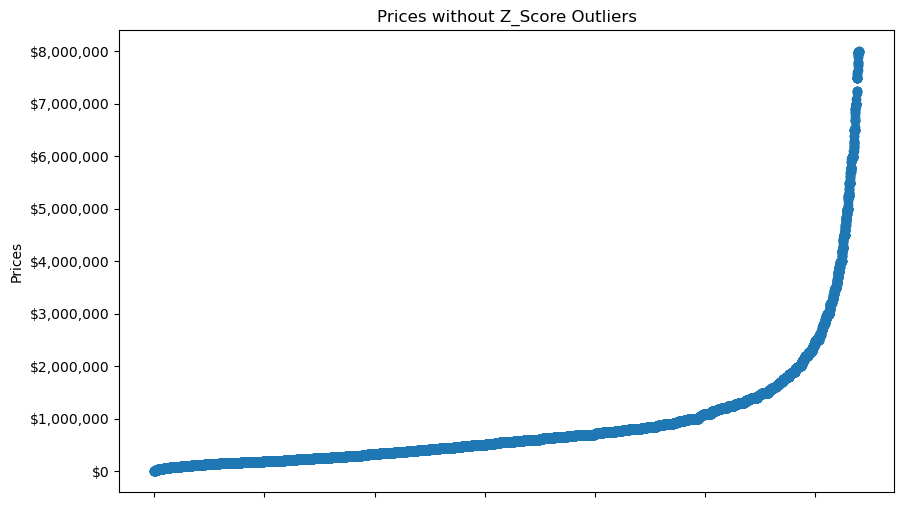

In [24]:
graph_df = realtor_data_df.drop(realtor_data_df.index[price_outliers_list_set]).sort_values(by="price")
graph_df.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

ax.scatter(x=graph_df.index, y=graph_df["price"], label="Samples")
#plt.plot(graph_df.index,graph_df["price"])
plt.title("Prices without Z_Score Outliers")
plt.xlabel("")
plt.ylabel("Prices")
plt.show()

### Use Z Score to eliminate outliers found in other features
#### The order in which the outliers are identified and removed is critical here.

In [25]:
realtor_data_df.drop(realtor_data_df.index[price_outliers_list], inplace=True)

realtor_data_df['z_bed'] = stats.zscore(realtor_data_df['bed'])
bed_outliers_list = list(np.where(np.abs(realtor_data_df['z_bed']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[bed_outliers_list], inplace=True)

realtor_data_df['z_bath'] = stats.zscore(realtor_data_df['bath'])
bath_outliers_list = list(np.where(np.abs(realtor_data_df['z_bath']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[bath_outliers_list], inplace=True)

realtor_data_df['z_acre_lot'] = stats.zscore(realtor_data_df['acre_lot'])
acre_lot_outliers_list = list(np.where(np.abs(realtor_data_df['z_acre_lot']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[acre_lot_outliers_list], inplace=True)

realtor_data_df['z_house_size'] = stats.zscore(realtor_data_df['house_size'])
house_size_outliers_list = list(np.where(np.abs(realtor_data_df['z_house_size']) > 3)[0])
realtor_data_df.drop(realtor_data_df.index[house_size_outliers_list], inplace=True)

realtor_data_df.head()

status  bed  bath  acre_lot          city     state  zip_code  \
1   for_sale  3.0   2.0      2.02     Claverack  New York   12521.0   
2   for_sale  4.0   2.0      0.24        Copake  New York   12521.0   
7   for_sale  3.0   2.0      1.20     Millerton  New York   12546.0   
16  for_sale  3.0   2.0      5.01  East Chatham  New York   12060.0   
27  for_sale  3.0   2.0     19.70     Hillsdale  New York   12529.0   

    house_size prev_sold_date     price   z_price     z_bed    z_bath  \
1       1600.0     2021-11-24  425000.0 -0.249253 -0.138124 -0.204345   
2       1239.0     2018-02-01  225000.0 -0.334305  0.480099 -0.204345   
7       1350.0     2018-08-31  375000.0 -0.270516 -0.138124 -0.204345   
16      2504.0     2020-11-09  435000.0 -0.245001 -0.138124 -0.204345   
27      1200.0     2021-01-20  625000.0 -0.164202 -0.138124 -0.204345   

    z_acre_lot  z_house_size  
1    -0.025215     -0.014849  
2    -0.026709     -0.368179  
7    -0.025903     -0.259537  
16   -0.022707      0.869945  
27   -0.010382     -0.406350

##### Drop the columns that were created when we calculated Z Score for each feature.

In [26]:
realtor_data_df.drop(columns=['z_price','z_bed','z_bath','z_acre_lot','z_house_size',"status","city","state"],inplace=True)

#### Draw a Hear Map for the features we will work with for the rest of NY analysis.

Text(0.5, 1.0, 'Correlation Between Variables')

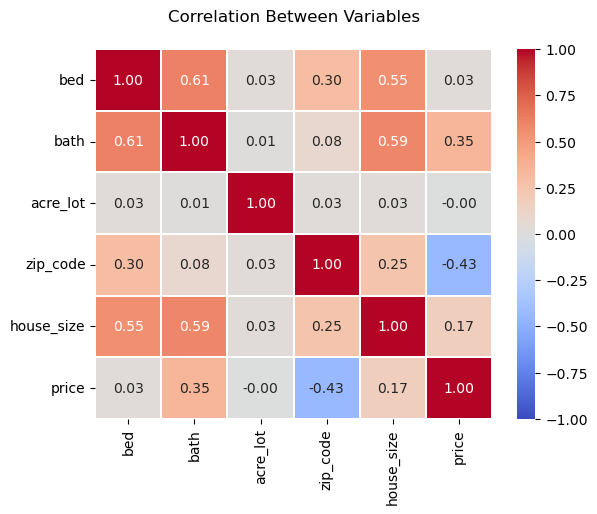

In [27]:
sns.heatmap(realtor_data_df.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

#### Draw a Pair Plot diagram for the features we will work with for the rest of NY analysis.

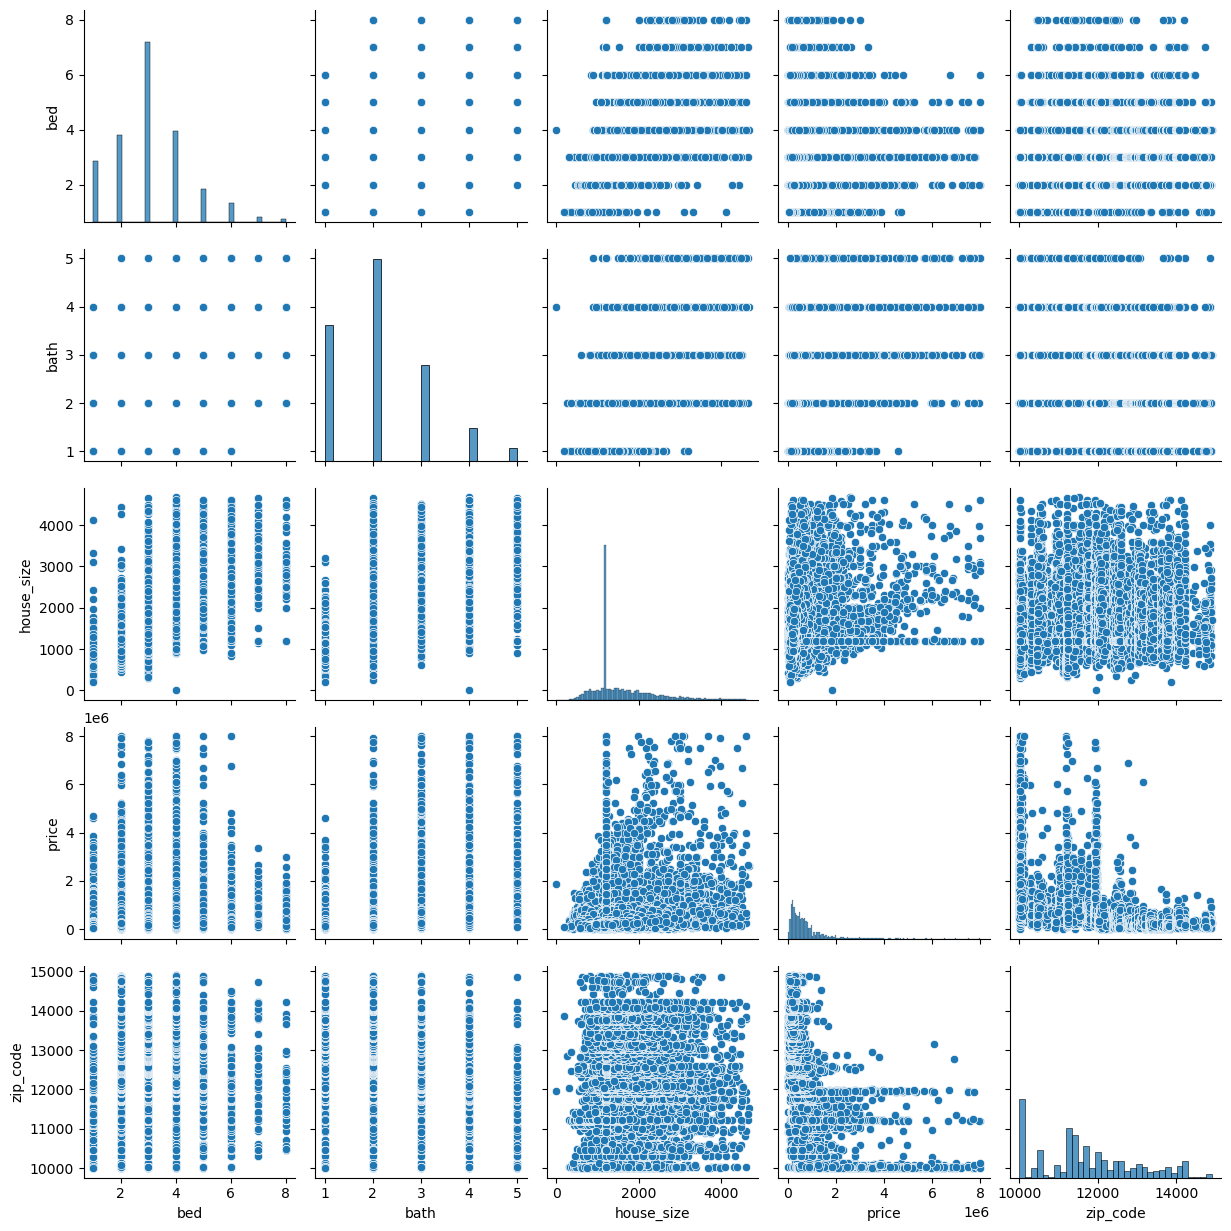

In [28]:
sns.pairplot(realtor_data_df[["bed","bath","house_size","price","zip_code"]])

#### List the features and their characteristics.

In [29]:
for col in realtor_data_df.columns.tolist():
    pprint(f"++++++++++++++++++ {col} ++++++++++++++++++")
    pprint(f"{realtor_data_df[col].unique()} : {realtor_data_df[col].nunique()} : {realtor_data_df[col].shape[0]}")
    print()

'++++++++++++++++++ bed ++++++++++++++++++'
'[3. 4. 5. 2. 7. 8. 6. 1.] : 8 : 12256'

'++++++++++++++++++ bath ++++++++++++++++++'
'[2. 4. 5. 3. 1.] : 5 : 12256'

'++++++++++++++++++ acre_lot ++++++++++++++++++'
('[2.0200e+00 2.4000e-01 1.2000e+00 5.0100e+00 1.9700e+01 1.1220e+01\n'
 ' 2.1700e+02 5.1000e-01 5.2000e+00 6.5000e-01 3.3000e-01 2.5100e+01\n'
 ' 5.5000e+00 1.3000e-01 8.2000e-01 4.7900e+00 5.0000e-02 4.5000e-01\n'
 ' 7.5400e+00 6.0000e-01 2.0000e+00 2.3900e+00 9.1000e-01 5.4380e+01\n'
 ' 1.0000e+00 5.0000e+00 2.0100e+00 2.5000e-01 4.2500e+00 5.6000e-01\n'
 ' 9.0000e-02 9.9000e+01 1.5000e+00 4.0800e+00 3.6000e-01 2.6700e+00\n'
 ' 4.3250e+01 5.0600e+00 1.7000e-01 3.2000e-01 6.1000e-01 1.0600e+00\n'
 ' 7.7000e-01 3.9000e+00 1.8000e-01 4.6000e-01 1.6060e+01 8.9500e+00\n'
 ' 3.5000e-01 2.7000e+00 1.2530e+01 8.6400e+00 5.7000e-01 1.0900e+01\n'
 ' 1.2900e+02 2.0300e+00 1.3130e+02 7.6000e-01 2.8000e-01 3.8500e+00\n'
 ' 1.7400e+00 1.5700e+00 1.7000e+00 3.3600e+00 1.6050e+01 6.8000e-01\

### Write the data to a file to be used by the Regression models.

In [30]:
realtor_data_df.to_csv('outliers.csv')

##### One last check of the zip code feature.

In [31]:
realtor_data_df.groupby(["zip_code"])["zip_code"].count().sort_values(ascending=False).head(10)

zip_code
10023.0    150
11201.0    149
10016.0    138
10011.0    136
10022.0    126
10014.0    110
10463.0    102
10021.0    101
10128.0     96
10065.0     96
Name: zip_code, dtype: int64